data source link: https://support.spatialkey.com/wp-content/uploads/2021/02/Sacramentorealestatetransactions.csv

In the following project, I have conducted exploratory data analysis on the data of real estate transactions in Sacramento city.
- The exploration involves the identification size, data cleaning, checking missing values, removing duplicates, and performing other preprocessing steps.
- Correlation analysis is conducted to recognize price dependency against baths, beds and square feet.
- A bar graph with beds and baths is plotted against price to visualise the dependency.
- It is noticed that the dependency is slightly inclined towards the bath, but it's not enough to consider it.
- Similarly, square feet against price is plotted, again showing no correlations sufficient to consider this interdependency.
- Then, all the houses are plotted on the map, followed by the heatmap of the houses and their corresponding price range in each area.

In [1]:
# file_paths = []
import pandas as pd
df = pd.read_csv('Sacramentorealestatetransactions.csv')
df

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


In [2]:
df.shape

(985, 12)

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

# Set default visualizations settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Data cleaning
# Checking for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64


In [5]:
# Dropping rows with missing critical values (if any)
# We assume that columns like 'price', 'sq__ft', 'beds', and 'baths' are essential for analysis
data = df.dropna(subset=['price', 'sq__ft', 'beds', 'baths'])
# Checking the data types to ensure they are correct
print("Data types before conversion:\n", data.dtypes)

Data types before conversion:
 street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object


In [6]:
# Converting 'sale_date' to datetime if it is not already
data['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# Removing any rows where the 'sale_date' conversion failed (if applicable)
data = df.dropna(subset=['sale_date'])

# Displaying the cleaned data's info to verify changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


C:\Users\Kartikeya\AppData\Local\Temp\ipykernel_17432\2964884527.py:2: FutureWarning: Parsed string "Wed May 21 00:00:00 EDT 2008" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  data['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')


In [7]:
for i in df['sale_date']:
    if i[11:19] !='00:00:00':
        print(i)

In [8]:
df['s_date'] = (df['sale_date'].str[4:7] + ' ' + df['sale_date'].str[8:10].str.strip() + ' ' + df['sale_date'].str[24:28]) 
df['s_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

df

C:\Users\Kartikeya\AppData\Local\Temp\ipykernel_17432\174876876.py:2: FutureWarning: Parsed string "Wed May 21 00:00:00 EDT 2008" included an un-recognized timezone "EDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['s_date'] = pd.to_datetime(df['sale_date'], errors='coerce')


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,s_date
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,2008-05-21
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,2008-05-21
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,2008-05-21
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,2008-05-21
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,2008-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,2008-05-15
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,2008-05-15
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,2008-05-15
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,2008-05-15


In [9]:
df['s_date'].dtype

dtype('<M8[ns]')

In [10]:
print(f"Number of rows: {len(data)}")

Number of rows: 985


In [11]:
# Checking for duplicates
# Identifying duplicate rows (all columns are considered)
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 3


In [12]:
# Removing duplicates if any are found
data = data.drop_duplicates()

# Verifying that duplicates were removed
print(f"Number of rows after removing duplicates: {len(data)}")

Number of rows after removing duplicates: 982


In [13]:
# Group by 'city' and 'zip' and calculate mean values
city_zip_analysis = df.groupby(['city', 'zip']).agg({
    'price': 'mean',
    'sq__ft': 'mean',
    'beds': 'mean',
    'baths': 'mean'
}).reset_index()

# Add analysis of property types
property_type_analysis = df.groupby(['city', 'zip', 'type']).size().unstack(fill_value=0).reset_index()

# Merge analyses for a complete view
complete_analysis = pd.merge(city_zip_analysis, property_type_analysis, on=['city', 'zip'], how='left')

# Sort by city and zip for better readability
complete_analysis = complete_analysis.sort_values(by=['city', 'zip'])

complete_analysis

,city,zip,price,sq__ft,beds,baths,Condo,Multi-Family,Residential,Unkown
0,ANTELOPE,95843,232496.393939,1716.636364,3.363636,2.212121,1,0,32,0
1,AUBURN,95603,405890.800000,898.600000,3.000000,2.600000,1,1,3,0
2,CAMERON PARK,95682,267944.444444,224.000000,2.444444,1.666667,1,0,8,0
3,CARMICHAEL,95608,295684.750000,1553.100000,3.050000,1.850000,3,0,17,0
4,CITRUS HEIGHTS,95610,226436.285714,1578.142857,3.428571,2.428571,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...
66,SHINGLE SPRINGS,95682,275000.000000,0.000000,0.000000,0.000000,0,0,0,1
67,SLOUGHHOUSE,95683,2000.000000,5822.000000,3.000000,4.000000,0,0,1,0
68,WALNUT GROVE,95690,380000.000000,1727.000000,3.000000,1.000000,0,0,1,0
69,WEST SACRAMENTO,95691,170700.000000,294.666667,0.666667,0.333333,0,0,3,0


In [14]:
# Calculate correlations and convert to percentages
correlations = {
    'sq__ft vs price': df['sq__ft'].corr(df['price']) * 100,
    'baths vs price': df['baths'].corr(df['price']) * 100,
    'beds vs price': df['beds'].corr(df['price']) * 100,
}

# Convert to DataFrame for visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Attributes', 'Correlation Percentage'])

correlation_df

,Attributes,Correlation Percentage
0,sq__ft vs price,33.389696
1,baths vs price,41.620807
2,beds vs price,34.202406


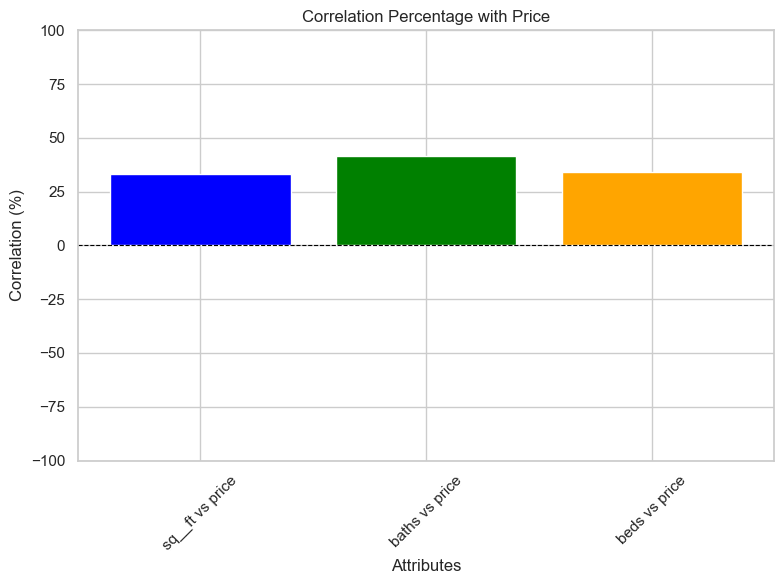

In [15]:
# Bar chart for correlations
plt.figure(figsize=(8, 6))
plt.bar(correlation_df['Attributes'], correlation_df['Correlation Percentage'], color=['blue', 'green', 'orange'])
plt.title('Correlation Percentage with Price')
plt.ylabel('Correlation (%)')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.ylim(-100, 100)  # Show negative correlations if any
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a baseline
plt.tight_layout()
plt.show()

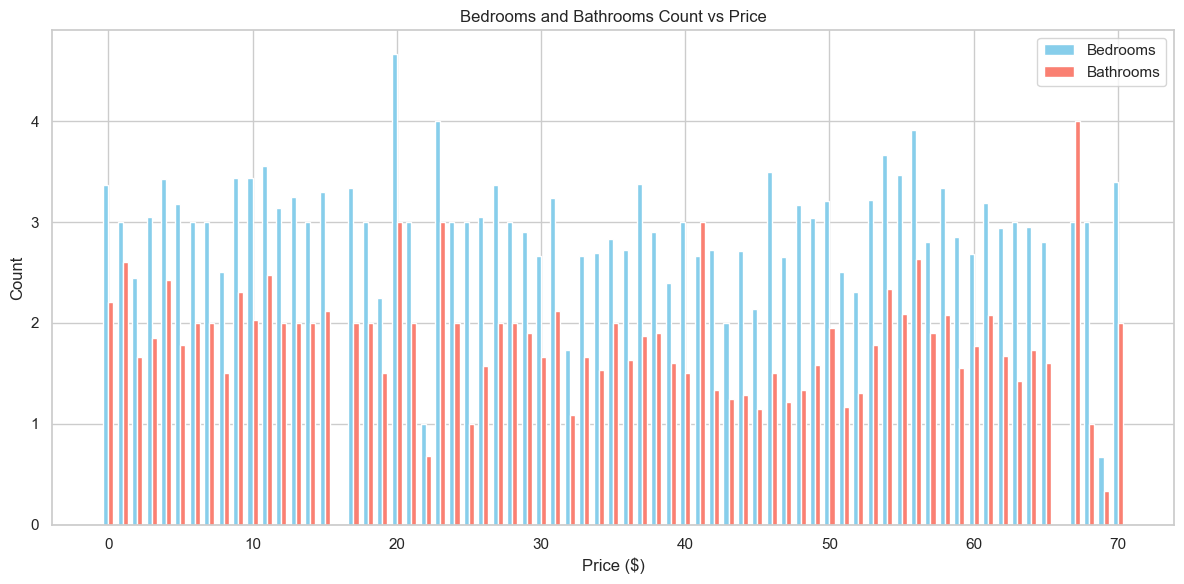

In [16]:
# Set bar width and positions
bar_width = 0.35
x = np.arange(len(complete_analysis))  # positions for the bars

# Figure 1: Beds and Baths vs Price
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, complete_analysis['beds'], width=bar_width, label='Bedrooms', color='skyblue')
plt.bar(x + bar_width / 2, complete_analysis['baths'], width=bar_width, label='Bathrooms', color='salmon')

# Add labels and title

plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.title('Bedrooms and Bathrooms Count vs Price')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Kartikeya\AppData\Local\Temp\ipykernel_17432\109538024.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sq_ft = complete_analysis.groupby('price_bin')['sq__ft'].mean()


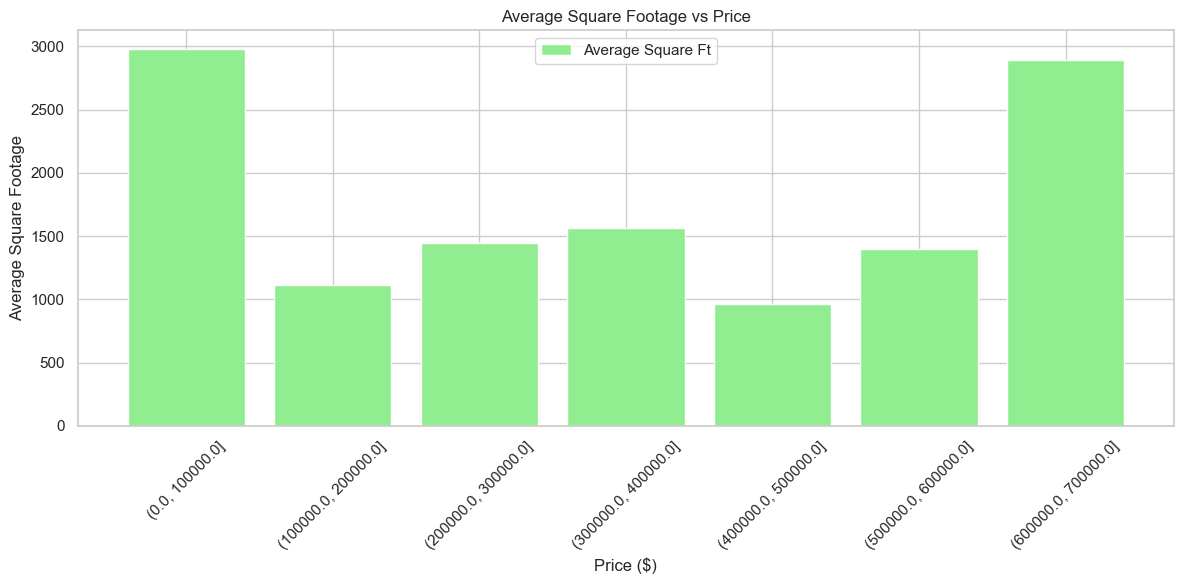

In [17]:
# Assuming complete_analysis['price'] is the column with the price data
min_price = 0
max_price = complete_analysis['price'].max()  # Use max price from data

# Ensure the bins are in integer ranges, with last bin extending to max value
bin_step = 100000  # Define the size of each bin step in integer ranges (you can adjust this)
bins = np.arange(min_price, max_price + bin_step, bin_step)  # Create bins in integer ranges

# Bin the prices into these integer bins
complete_analysis['price_bin'] = pd.cut(complete_analysis['price'], bins=bins)

# Group by price bins and calculate the average square footage in each bin
avg_sq_ft = complete_analysis.groupby('price_bin')['sq__ft'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(avg_sq_ft.index.astype(str), avg_sq_ft, color='lightgreen', label='Average Square Ft')

# Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Average Square Footage')
plt.title('Average Square Footage vs Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

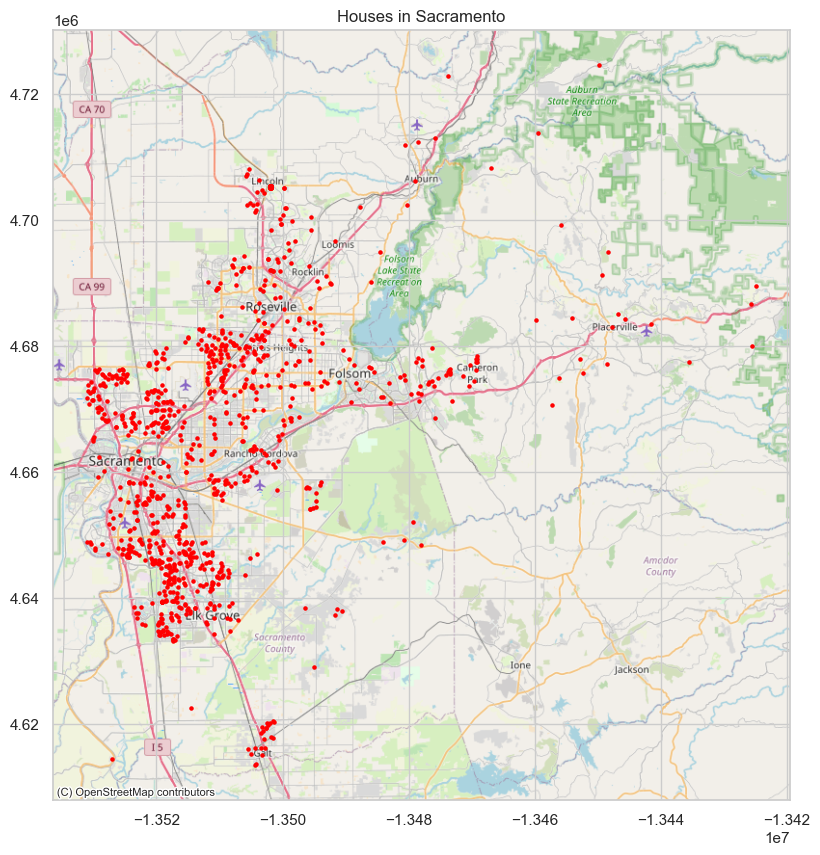

In [18]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

# Assuming 'df' contains 'latitude' and 'longitude' columns
# Create geometry column from longitude and latitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')  # WGS84 Coordinate Reference System

# Reproject GeoDataFrame to Web Mercator (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Plot the house locations with a basemap
ax = gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 10))
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and show plot
plt.title('Houses in Sacramento')
plt.show()

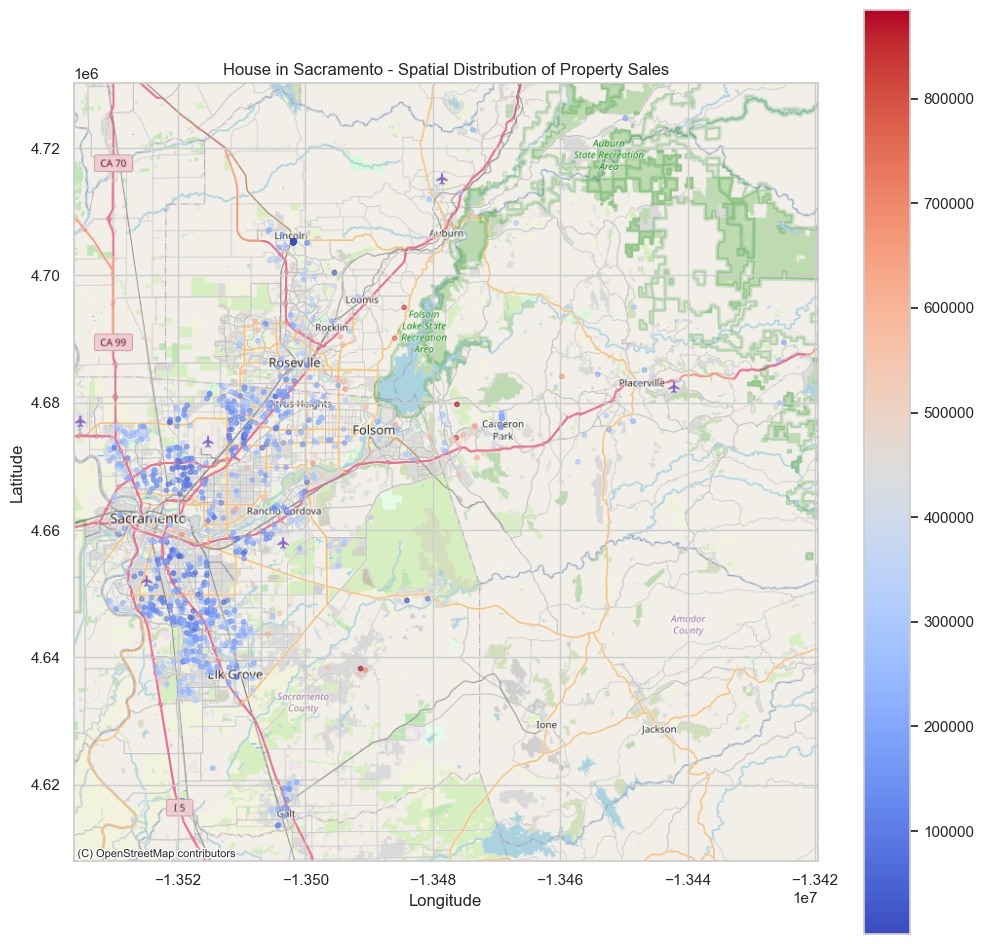

In [19]:
# Plotting the properties with color intensity based on price
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the properties and color them based on price values
gdf.plot(ax=ax, column='price', cmap='coolwarm', markersize=10, alpha=0.6, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, crs=gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title and labels
plt.title('House in Sacramento - Spatial Distribution of Property Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply outlier detection for 'price', 'sq__ft', 'beds', and 'baths'
outliers_price, price_lower, price_upper = detect_outliers(df, 'price')
outliers_sqft, sqft_lower, sqft_upper = detect_outliers(df, 'sq__ft')
outliers_beds, beds_lower, beds_upper = detect_outliers(df, 'beds')
outliers_baths, baths_lower, baths_upper = detect_outliers(df, 'baths')

# Combine all outliers into one DataFrame for visualization
outliers_combined = pd.concat([outliers_price, outliers_sqft, outliers_beds, outliers_baths]).drop_duplicates()

# Display outliers summary
print(f"Outliers for price: Lower bound = {price_lower}, Upper bound = {price_upper}")
print(f"Outliers for square footage: Lower bound = {sqft_lower}, Upper bound = {sqft_upper}")
print(f"Outliers for beds: Lower bound = {beds_lower}, Upper bound = {beds_upper}")
print(f"Outliers for baths: Lower bound = {baths_lower}, Upper bound = {baths_upper}")

# Display outliers
print("\nOutliers in the dataset:")
print(outliers_combined)

Outliers for price: Lower bound = -87500.0, Upper bound = 532500.0
Outliers for square footage: Lower bound = -197.0, Upper bound = 2867.0
Outliers for beds: Lower bound = -1.0, Upper bound = 7.0
Outliers for baths: Lower bound = -0.5, Upper bound = 3.5

Outliers in the dataset:
                 street             city    zip state  beds  baths  sq__ft  \
152   2217 APPALOOSA CT           FOLSOM  95630    CA     4      2    2462   
153  868 HILDEBRAND CIR           FOLSOM  95630    CA     0      0       0   
154    6030 PALERMO WAY  EL DORADO HILLS  95762    CA     4      3       0   
155     4070 REDONDO DR  EL DORADO HILLS  95762    CA     4      3       0   
156     4004 CRESTA WAY       SACRAMENTO  95864    CA     3      3    2325   
..                  ...              ...    ...   ...   ...    ...     ...   
278     1102 CHESLEY LN          LINCOLN  95648    CA     4      4       0   
366        7342 GIGI PL       SACRAMENTO  95828    CA     4      4    1995   
451  10949 SCOTSMA

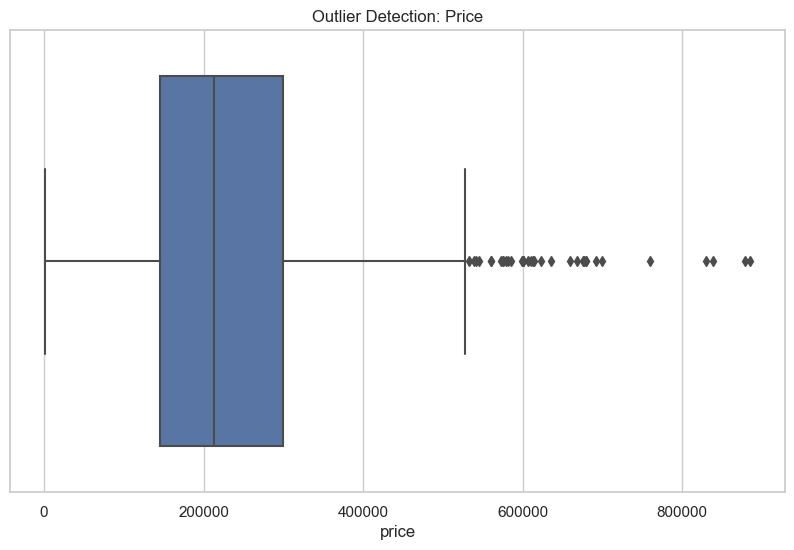

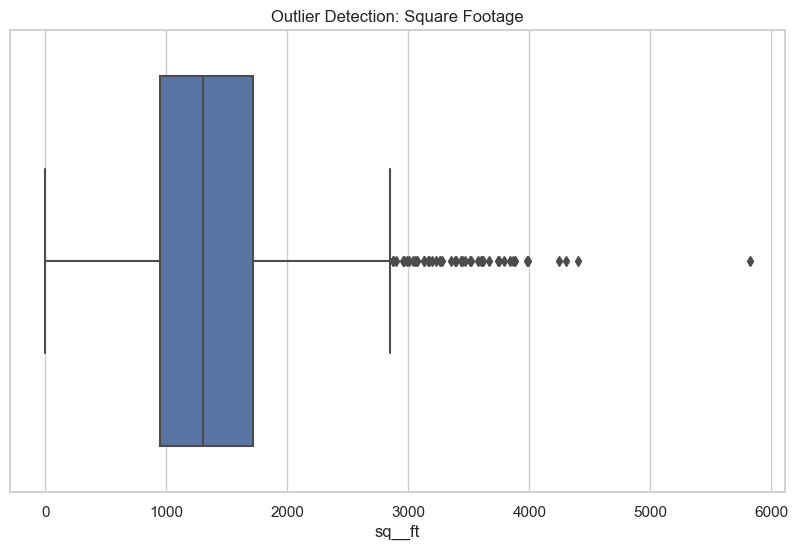

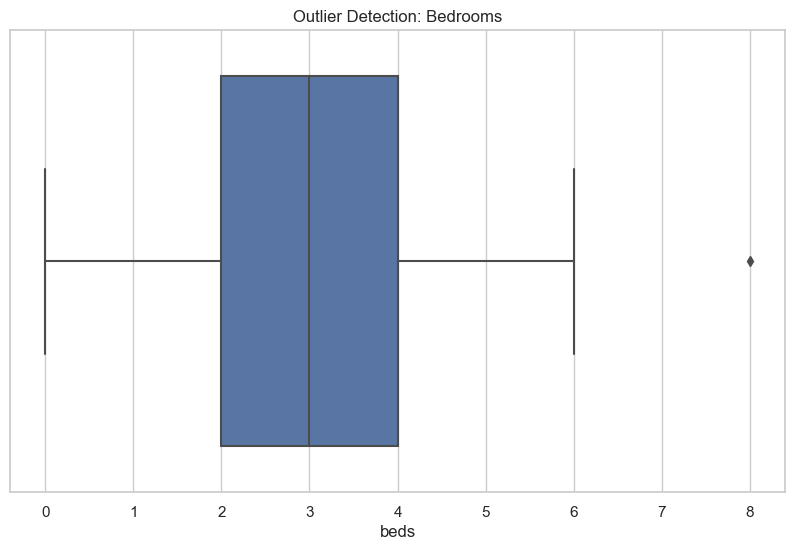

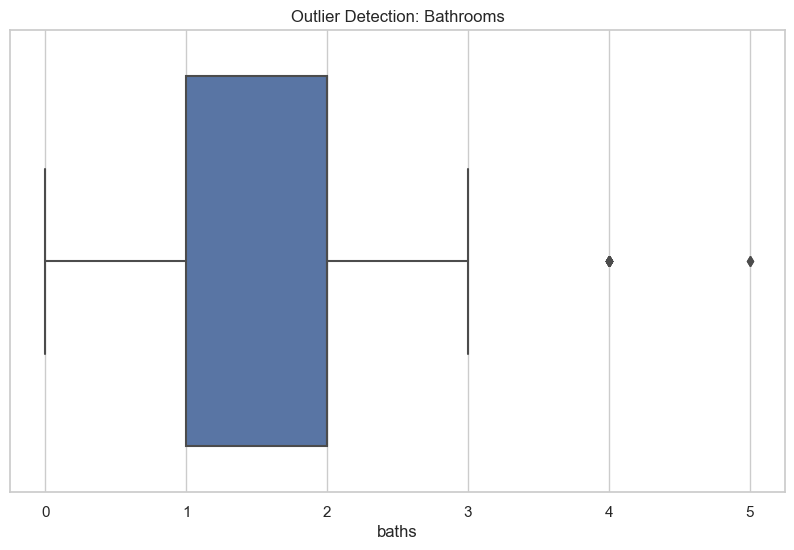

In [21]:
# Plotting outliers for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Outlier Detection: Price')
plt.show()

# Plotting outliers for square footage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sq__ft'])
plt.title('Outlier Detection: Square Footage')
plt.show()

# Plotting outliers for number of bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['beds'])
plt.title('Outlier Detection: Bedrooms')
plt.show()

# Plotting outliers for number of bathrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['baths'])
plt.title('Outlier Detection: Bathrooms')
plt.show()